<h1 align='center'> SMC - TD1 </h1>
<h4 align='right'><i> author: Hicham Janati </i></h4>
<h3> Random number generators - RANDU </h3>

In [103]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

### Question 2
- On génére 50000 points

In [104]:
def randu(N, seed=1):
    """Generateur Randu.
    N: int.
        number of samples.
    s: int.
        random seed.
    """
    X = []
    x = seed
    for i in range(N):
        a = (2 ** 16 + 3) * x
        x = a % (2 ** 31)
        X.append(x / 2 ** 31)
    X = np.array(X)
    return X

In [105]:
N = 50001
U = randu(N)
x = U[:-2]
y = U[1:-1]
z = U[2:]

### Question 3
- On plot $$x_k = f(x_{k-2})$$ pour $$ 0.5 < x_{k-1} < 0.51 $$

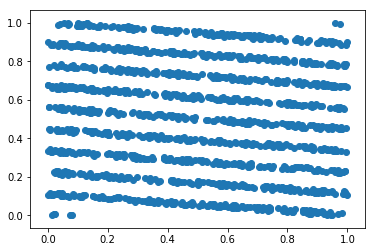

In [106]:
filtre = (y < 0.52) * (y > 0.49)
plt.figure()
plt.scatter(z[filtre], x[filtre])
plt.show()

### Question 4

Les bits de faible poids sont les bits associés aux faibles unités. Ici je plot les derniers 4 bits des 50 premiers x.
La fonction map applique a chaque élément la transformation en binaire puis en int.

In [107]:
X = (2 ** 31 * U).astype(int)
bits = list(map(lambda x: int("{0:b}".format(x)[-4:]), X[:50]))

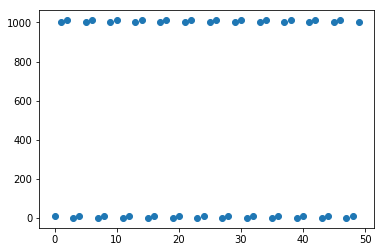

In [108]:
plt.figure()
plt.plot(bits, 'o')
plt.show()

### Question 5
On plot $$x_k = f(x_{k-1}, x_{k-2})$$

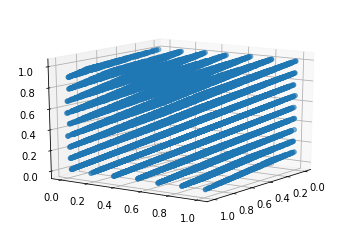

In [109]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter3D(z, y, x)
ax.view_init(15, 35)
plt.show()

### Générateur codé proprement
#### Notion de "closure"
La fonction suivante utilise le fait que les listes ne sont pas 'mutables' et donc une fonction peut modifier leur contenu. Le seed est donc enregistré et incrementé à chaque appel de la fonction.

In [110]:
def randu(s=1):
    seed = [s]
    def randfunc():
        a = (2 ** 16 + 3) * seed[0]
        out = a % (2 ** 31)
        seed[0] = out
        return out / (2 ** 31)
    return randfunc

In [111]:
N = 5000
X = np.empty((N, 3))
rand = randu()
for i in range(N):
    for j in range(3):
        X[i, j] = rand()

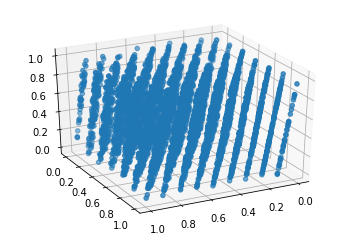

In [112]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter3D(X.T[0], X.T[1], X.T[2])
ax.view_init(30, 63)
plt.show()